# Data Cleaning, Pre-processing, and Feature Engineering
## Detecting Gender Bias in Job Descriptions

# Job Description Analysis

This notebook performs data cleaning and feature extraction on job descriptions, focusing on detecting gender bias through communal and agentic language.


In [47]:
# Import necessary libraries
import pandas as pd
import nltk
import pycountry
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import re
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from textstat import textstat
import seaborn as sns
from wordcloud import WordCloud
import spacy
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

## Download NLTK Data

Download necessary NLTK data for tokenization, stopwords, and lemmatization.


In [48]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kristenfinley/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kristenfinley/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kristenfinley/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Load and Inspect Data

Load the CSV file into a Pandas DataFrame and inspect the first few rows and general information.


In [49]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('eda_data.csv')

# Inspect the data
print(df.head())
print(df.info())


   Unnamed: 0                  Job Title              Salary Estimate  \
0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2           2             Data Scientist   $80K-$90K (Glassdoor est.)   
3           3             Data Scientist   $56K-$97K (Glassdoor est.)   
4           4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.

In [50]:
agentic_words = [
    'active', 'actionable', 'agile', 'algorithmic', 'analytic', 'ambition', 
    'ambitious', 'appropriate', 'asserting', 'assertive', 'assertiveness', 'authority', 
    'autonomous', 'big', 'bold', 'challenger', 'collective', 'competitive', 
    'computational', 'confident', 'critical', 'decisive', 'disciplined', 'dominance', 
    'dominant', 'driven', 'driving', 'dynamic', 'efficient', 'equal', 'essential', 
    'exciting', 'executive', 'exploratory', 'external', 'flexible', 'fundamental', 
    'global', 'goal-oriented', 'great', 'high', 'high-achieving', 'ideal', 
    'impactful', 'important', 'independence', 'innovative', 'interdisciplinary', 
    'internal', 'interpersonal', 'keen', 'leadership', 'local', 'managerial', 
    'mastery', 'motivated', 'physical', 
    'problem-solving', 'productive', 'proficient', 'proactive', 'purposeful', 
    'quantitative', 'reasonable', 'resilient', 'resourceful', 'result-oriented', 
    'rewarding', 'rigorous', 'risk-taking', 'rule', 'scientific', 'self-assured', 
    'self-confident', 'self-reliant', 'self-starter', 
    'strategic', 'strong', 'structured', 'talented', 
    'tenacious', 'unstructured', 'unique', 'vigor', 'visionary'
]

communal_words = [
    'affable', 'agreeable', 'altruism', 'amicable', 'approachable', 'benevolent', 
    'caring', 'charitable', 'charming', 'collaborate', 'collaborative', 'community', 
    'community-oriented', 'compassionate', 'considerate', 'cohesive', 'cooperative', 
    'cordial', 'cross-functional', 'dedicated', 'emotional intelligence', 'empathetic', 
    'empathic', 'empathy', 'family', 'forgiving', 'friendly', 'generous', 'gentle', 'gracious', 
    'helpful', 'helping', 'home', 'humane', 'inclusive', 'kind', 'kind-hearted', 'likable', 
    'loyal', 'neighborly', 'nurturing', 'partner', 'patient', 'personable', 'reliable', 
    'responsive', 'share', 'sociable', 'support', 'supporting', 'supportive', 
    'sympathetic', 'sympathizing', 'team', 'teamwork', 'thoughtful', 'tolerant', 
    'trustworthy', 'understanding', 'warm'
]

In [51]:
# Define stop words and initialize lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Clean text function
def clean_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return tokens

# Lemmatize text function
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Detect agentic words function
def detect_agentic_words(filtered_lemmas, agentic_words):
    words = filtered_lemmas.split()
    detected_words = [word for word in words if word.lower() in agentic_words]
    return ' '.join(detected_words)

# Detect communal words function
def detect_communal_words(filtered_lemmas, communal_words):
    words = filtered_lemmas.split()
    detected_words = [word for word in words if word.lower() in communal_words]
    return ' '.join(detected_words)

# Assuming 'df' is your DataFrame and 'agentic_words' and 'communal_words' are predefined sets/lists

# Apply the lemmatize_text function to create a column of lemmatized text
df['Lemmatized_Description'] = df['Job Description'].apply(lemmatize_text)

# Create the 'Agentic_Words' and 'Communal_Words' columns
df['Agentic_Words'] = df['Lemmatized_Description'].apply(lambda x: detect_agentic_words(x, agentic_words))
df['Communal_Words'] = df['Lemmatized_Description'].apply(lambda x: detect_communal_words(x, communal_words))

# Count the number of agentic and communal words in each job description
df['Agentic_Count'] = df['Agentic_Words'].apply(lambda x: len(x.split()))
df['Communal_Count'] = df['Communal_Words'].apply(lambda x: len(x.split()))

# Save the modified DataFrame to a new CSV file
df.to_csv('gendered_data.csv', index=False)


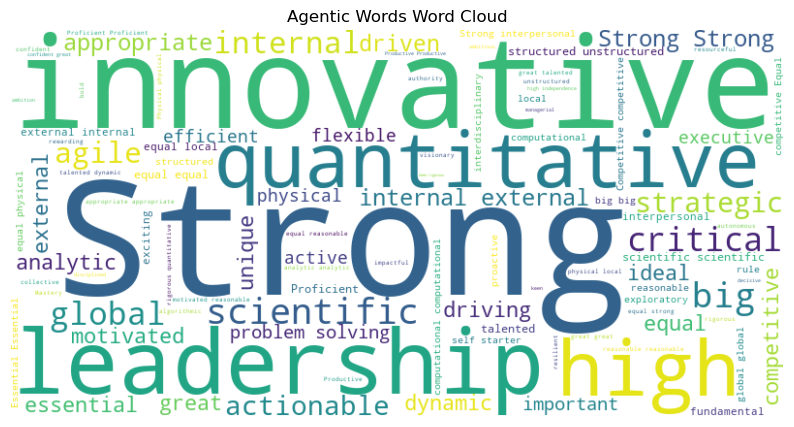

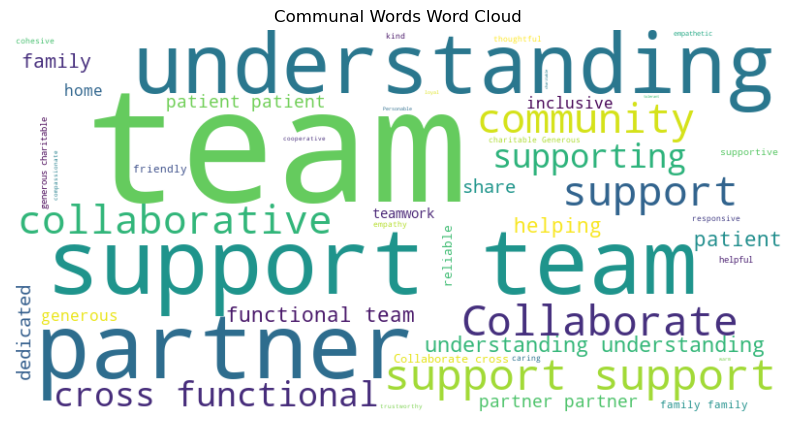

In [52]:
# Generate word clouds for agentic and communal words
agentic_text = ' '.join(df['Agentic_Words'].dropna())
communal_text = ' '.join(df['Communal_Words'].dropna())

# Plot word cloud for agentic words
agentic_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(agentic_text)
plt.figure(figsize=(10, 6))
plt.imshow(agentic_wordcloud, interpolation='bilinear')
plt.title('Agentic Words Word Cloud')
plt.axis('off')
plt.show()

# Plot word cloud for communal words
communal_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(communal_text)
plt.figure(figsize=(10, 6))
plt.imshow(communal_wordcloud, interpolation='bilinear')
plt.title('Communal Words Word Cloud')
plt.axis('off')
plt.show()

<Figure size 1000x600 with 0 Axes>

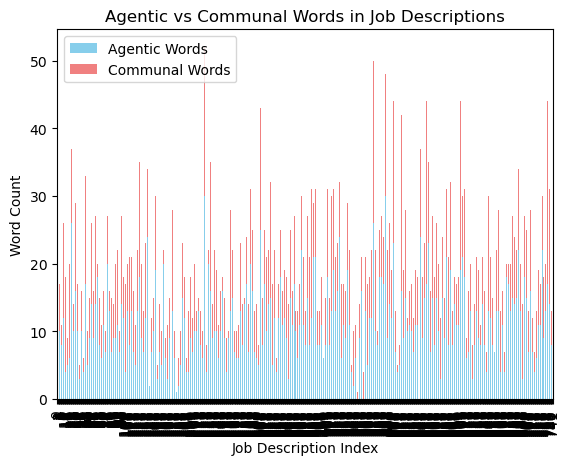

In [53]:

# Plot the counts
plt.figure(figsize=(10, 6))
df[['Agentic_Count', 'Communal_Count']].plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.title('Agentic vs Communal Words in Job Descriptions')
plt.xlabel('Job Description Index')
plt.ylabel('Word Count')
plt.legend(['Agentic Words', 'Communal Words'])
plt.show()


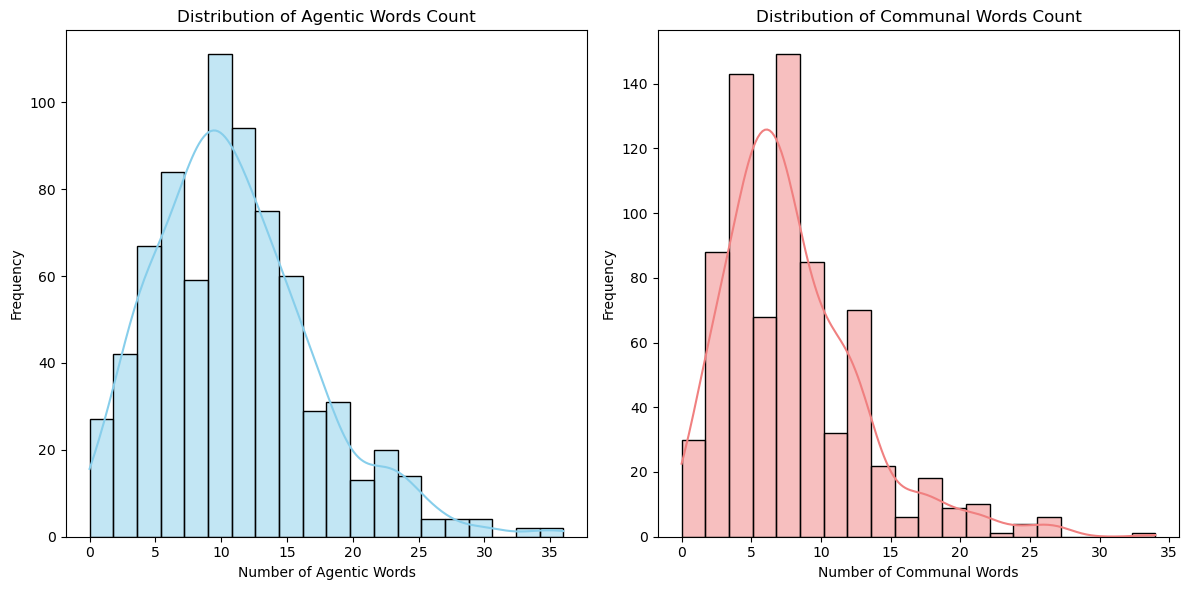

In [54]:
# Plot histogram for agentic words count
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Agentic_Count'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Agentic Words Count')
plt.xlabel('Number of Agentic Words')
plt.ylabel('Frequency')

# Plot histogram for communal words count
plt.subplot(1, 2, 2)
sns.histplot(df['Communal_Count'], bins=20, kde=True, color='lightcoral')
plt.title('Distribution of Communal Words Count')
plt.xlabel('Number of Communal Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [57]:
# Check column names and data types
print(df.info())
print(df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              742 non-null    int64  
 1   Job Title               742 non-null    object 
 2   Salary Estimate         742 non-null    object 
 3   Job Description         742 non-null    object 
 4   Rating                  742 non-null    float64
 5   Company Name            742 non-null    object 
 6   Location                742 non-null    object 
 7   Headquarters            742 non-null    object 
 8   Size                    742 non-null    object 
 9   Founded                 742 non-null    int64  
 10  Type of ownership       742 non-null    object 
 11  Industry                742 non-null    object 
 12  Sector                  742 non-null    object 
 13  Revenue                 742 non-null    object 
 14  Competitors             742 non-null    ob